In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 24: Hypothesis Testing Errors & Power

Throughout this block, we have been studying hypothesis tests. We have covered the four basic steps of any hypothesis test, and we have practiced various methods for obtaining the distribution of our test statistic under the null hypothesis. 

After we have reached a conclusion (reject or fail to reject), we must consider possible errors. 

### Type I error 

Type I error is the event that we rejected the null hypothesis when the null hypothesis was actually true. Type I error is also known as a false positive. The probability of a Type I error is usually defined by the threshold used for rejection. A common threshold is 0.05. Those of you who have taken statistics before may recognize this value as $\alpha$. 

### Type II error

Type II error is the event that we failed to reject the null hypothesis when the null hypothesis was actually false. This is otherwise known as a false negative. The probability of a Type II error is harder to find and requires a more in-depth analysis of a hypothesis test. The probability of a Type II error is often given as $\beta$, and $1-\beta$ is referred to as **Power**. The power of a test is probability that we will reject the null hypothesis when we are supposed to. 

Which one of these errors is more serious? It depends on the context of the problem. 

### Example: Golf Balls

Joe has a summer job at a golf course and one of his jobs is to fish out golf balls from the water traps. He has a theory that certain types of golf ball are more likely to end up in the water than others. Let's assume there are four brands of golf ball, let's and assume that all four are used equally at this golf course. He fishes out 100 golf balls and counts each brand. He finds 30 of brand A, 30 of brand B, 20 of brand C and 20 of brand D. Conduct a hypothesis test to determine whether certain types of golf ball are more likely than others to end up in the water.

Step 1: Hypotheses

Null: Joe is equally likely to choose any type of golf ball.
Alternate: Joe is more likely to choose A and B over C and D

Step 2: Test statistic

There are many correct answers, but let's go with sum of absolute difference between observed and expected counts under $H_0$. To do this, we need to find the expected counts. If each ball was equally likely, how many should we expected to find of each if we select 100 golf balls? 

In [2]:


obs=np.array([30,30,20,20])
obs_ts=abs(obs-25).sum()
obs_ts

20

Step 3: $p$-value

We need the distribution of the test statistic under $H_0$. 

In [3]:
ts=[]
for _ in np.arange(10000):
    rs=stats.multinomial.rvs(100,[0.25,0.25,0.25,0.25],size=1)
    ts=np.append(ts,sum(abs(sum(rs)-25)))
    
ts

array([20.,  8.,  6., ..., 26., 18.,  8.])

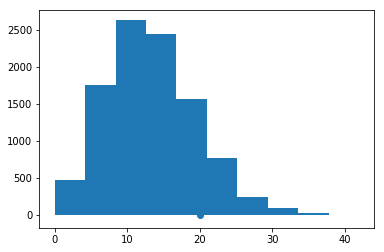

In [4]:
plt.hist(ts)
plt.scatter(obs_ts,0)
plt.show()

In [5]:
np.mean(ts>=20)

0.1843

Step 4: Conclude

Fail to reject the null hypothesis. Data does not suggest any type of golf ball is more likely than another.

What kind of error could we have made in this case? 

Type II error

#### Power 
Suppose that, in truth, 30% of the balls found in the water were brand A, 30% were brand B, 20% were brand C and 20% were brand D. In this case, our collected sample reflected this truth perfectly. However, our hypothesis test failed to recognize this deviation from equal proportions. We made a type II error. This is because this test has fairly low power. Use simulation to determine the power of this test. 

I am looking for the probability that I reject the null hypothesis given the true proportions laid out above. Well, first I need to figure out for what values of my test statistic I would reject $H_0$. 

In [6]:
percentile(95,ts)

crit=25
np.mean(ts>=25)

0.0371

Next, I need to simulate from the true population and determine how often my test statistic would have met this threshold. 

In [7]:
ts_power=np.sum(abs(stats.multinomial.rvs(100,[.3,.3,.2,.2],size=10000)-25),axis=1)

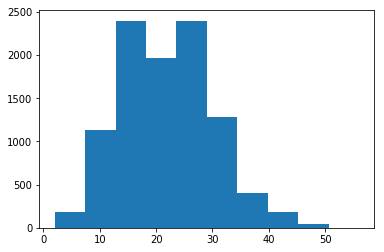

In [8]:
plt.hist(ts_power)
plt.show()

In [9]:
np.mean(ts_power>=25)

0.3407

What do you think about this power? 

Not good since we only detect the difference 34% of the time.

Repeat this power calculation, but assume Joe collects 500 balls instead of 100. Note that you will have to obtain a new critical value. What does this tell you about power and sample size?

In [10]:
ts200=np.sum(abs(stats.multinomial.rvs(200,[.25,.25,.25,.25],size=10000)-50),axis=1)

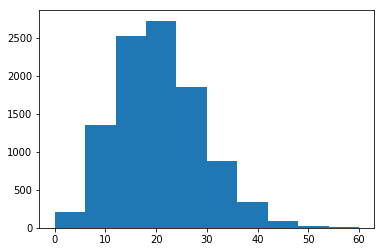

In [11]:
plt.hist(ts200)
plt.show()

In [12]:
np.mean(ts200>=35)

0.0456

In [13]:
ts200_power=np.sum(abs(stats.multinomial.rvs(200,[.3,.3,.2,.2],size=10000)-50),axis=1)
ts200_power

array([52, 38, 34, ..., 26, 24, 40])

In [14]:
np.mean(ts200_power>=35)

0.6643

Power is better with a higher sample size.